In [1]:
import os
import networkx as nx
import freeman as fm
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from statsmodels.api import OLS

g = fm.load('./finaltopic.gml')
g.set_nodecol('score', 'score')
g.set_nodecol('titulo', 'title')
df = g.nodeframe
b = nx.betweenness_centrality(g)
!say alert

In [3]:
df['betweenness'] = [b[n] for n in b]
df['degree']=[n for n in nx.degree_centrality(g).values()]
print(df.head(5))
# !say acabou

   id  score               titulo  betweenness    degree
0   0   7.22  .hack//G.U. Trilogy     0.000863  0.616933
1   1   6.67    .hack//Liminality     0.000164  0.362932
2   2   7.25       .hack//Quantum     0.000036  0.161074
3   3   6.99         .hack//Roots     0.000686  0.575632
4   4   7.07          .hack//Sign     0.000207  0.371709


In [4]:
model = OLS(list(df['score']), list(df['betweenness']))
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.425
Model:                            OLS   Adj. R-squared (uncentered):              0.425
Method:                 Least Squares   F-statistic:                              1434.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                   2.32e-235
Time:                        21:40:28   Log-Likelihood:                         -5909.7
No. Observations:                1938   AIC:                                  1.182e+04
Df Residuals:                    1937   BIC:                                  1.183e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8859.6117    233.940     37.871      0.000    8400.811    9318.412
==============================================================================
Omnibus:                      997.793   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7571.907
Skew:                          -2.318   Prob(JB):                         0.00
Kurtosis:                      11.502   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
v = np.array(list(zip(df['betweenness'],list(df['degree']))))
model = OLS(list(df['score']),v)
res = model.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.830
Model:                            OLS   Adj. R-squared (uncentered):              0.830
Method:                 Least Squares   F-statistic:                              4721.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                        0.00
Time:                        21:40:28   Log-Likelihood:                         -4730.5
No. Observations:                1938   AIC:                                      9465.
Df Residuals:                    1936   BIC:                                      9476.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3395.8765    221.031    -15.364      0.000   -3829.360   -2962.393
x2            17.7005      0.261     67.836      0.000      17.189      18.212
==============================================================================
Omnibus:                      114.434   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.698
Skew:                           0.481   Prob(JB):                     3.70e-22
Kurtosis:                       2.454   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

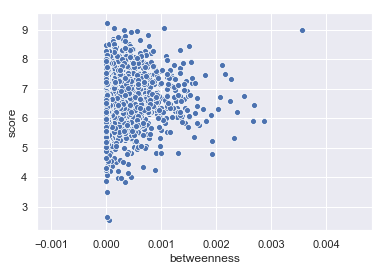

In [6]:
# !say acabou
%matplotlib inline

fm.scaplot(df,'betweenness','score')


In [7]:
fm.cortest(df,'score', 'betweenness')

(0.030666, 0.177189)

In [8]:
fm.cortest(df,'score', 'degree')

(0.107031, 2e-06)

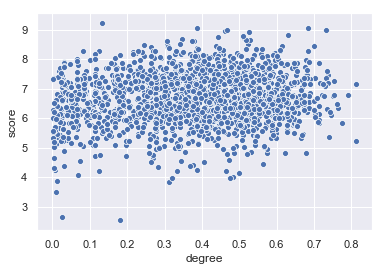

In [9]:
fm.scaplot(df, 'degree','score')

In [10]:
fm.cortest(df, 'degree','score')

(0.107031, 2e-06)

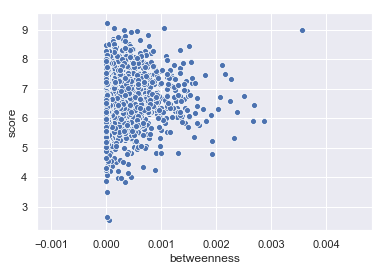

In [11]:
fm.scaplot(df, 'betweenness','score')

In [12]:
model = OLS(list(df['score']), list(df['degree']))
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                              8210.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                        0.00
Time:                        21:40:29   Log-Likelihood:                         -4841.9
No. Observations:                1938   AIC:                                      9686.
Df Residuals:                    1937   BIC:                                      9691.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            14.4237      0.159     90.610      0.000      14.112      14.736
==============================================================================
Omnibus:                       89.829   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.877
Skew:                           0.213   Prob(JB):                     4.01e-11
Kurtosis:                       2.359   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


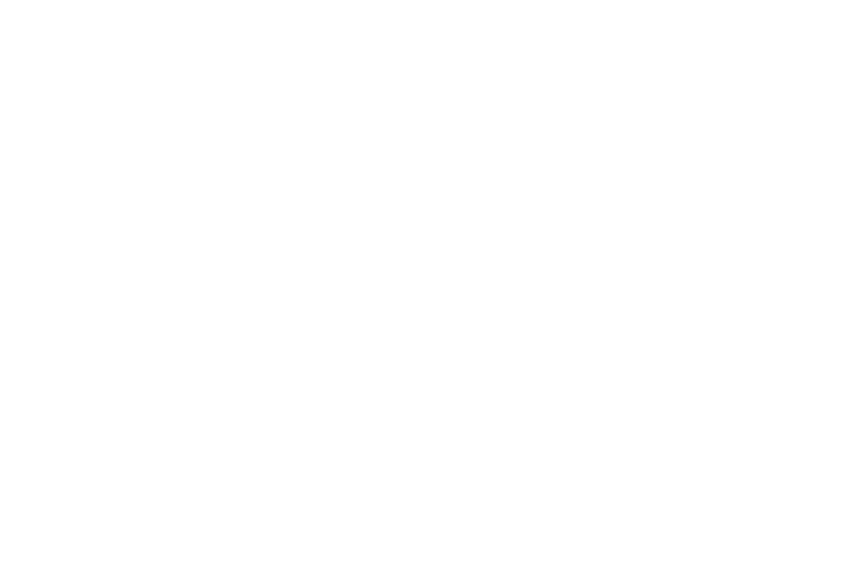

ValueError: Unknown projection '3d'

<IPython.core.display.Javascript object>


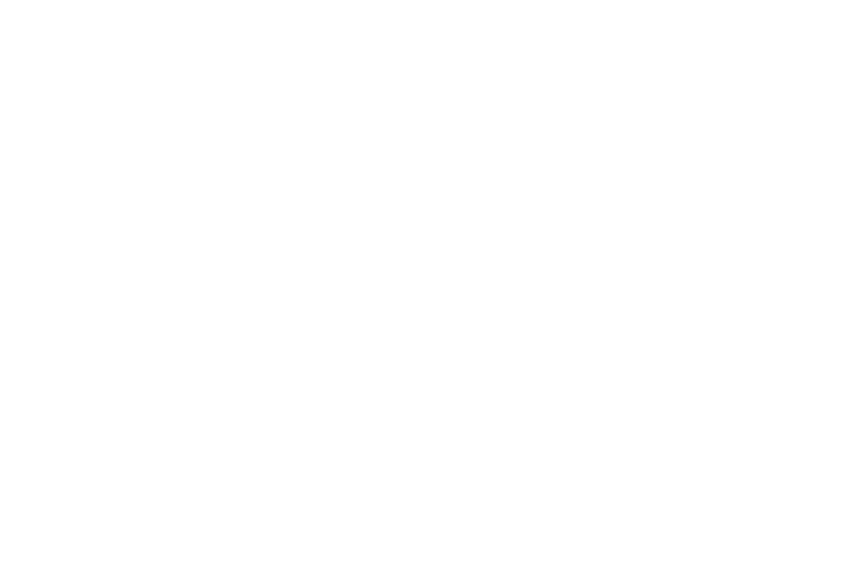

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')


x = list(df['degree'])
y = list(df['betweenness'])
z = list(df['score'])

# print(len(x),len(y),len(z))
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
ax.scatter3D(x, y, z, c=z, cmap='YlOrBr')
